<a href="https://colab.research.google.com/github/AVIK-geophy/F3_Log_Data_Segementation/blob/main/F3_Log_Data_Machine_Learning_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
!pip install lasio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 920.7 kB/s eta 0:00:00


In [ ]:
import lasio

# 2. DATA LOADING STEPS

*   Connecting Drive
*   Loading Using Lasio and Converting to Data_Frame



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
las=lasio.read("/content/drive/MyDrive/PhD MATERIALS/6. DATA/F3_Data/WELL_LOG_LAS/F02-1_logs.las")

In [ ]:
F02_1=las.df()

# 3. DATA ANALYSIS PART (EDA)

In [ ]:
F02_1.head()

,RHOB,DT,GR,AI,AI_REL,PHIE
DEPTH,,,,,,
48.00,NaN,524.0485,NaN,3820257.00,-455.6956,NaN
48.15,NaN,524.0410,NaN,3820311.75,-455.6956,NaN
48.30,NaN,524.0336,NaN,3820366.25,-455.6956,NaN
48.45,NaN,524.0262,NaN,3820419.75,-455.6956,NaN
48.60,NaN,524.0190,NaN,3820472.25,-455.6956,NaN


In [ ]:
F02_1.isna().sum()

RHOB      1427
DT           0
GR          14
AI           0
AI_REL       0
PHIE      4774
dtype: int64

In [ ]:
F02_1.shape
Well_F02_1 = F02_1.rename_axis('DEPTH').reset_index()
Well_F02_1['WELL_NAME']='F02_1' #adding WELL_NAME Column to all rows
Well_F02_1.head()

,DEPTH,RHOB,DT,GR,AI,AI_REL,PHIE,WELL_NAME
0,48.00,NaN,524.0485,NaN,3820257.00,-455.6956,NaN,F02_1
1,48.15,NaN,524.0410,NaN,3820311.75,-455.6956,NaN,F02_1
2,48.30,NaN,524.0336,NaN,3820366.25,-455.6956,NaN,F02_1
3,48.45,NaN,524.0262,NaN,3820419.75,-455.6956,NaN,F02_1
4,48.60,NaN,524.0190,NaN,3820472.25,-455.6956,NaN,F02_1


<function matplotlib.pyplot.show(close=None, block=None)>

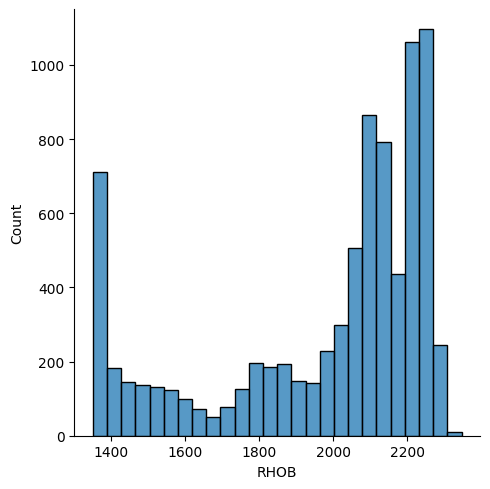

In [ ]:
sns.displot(F02_1['RHOB'])
plt.show

In [ ]:
F02_1.describe()

,RHOB,DT,GR,AI,AI_REL,PHIE
count,8253.000000,9680.000000,9666.000000,9.680000e+03,9680.000000,4906.000000
mean,1975.091074,495.026839,46.613531,4.078518e+06,5193.728898,0.304522
std,294.677828,50.861145,23.484662,8.776878e+05,193455.679167,0.064282
min,1350.444700,368.114700,1.339200,2.035267e+06,-617319.750000,0.203900
25%,1812.400000,460.693600,23.527000,3.658766e+06,-95113.828100,0.257900
50%,2096.345000,505.393400,48.765250,3.953107e+06,2603.301500,0.283000
75%,2210.906000,521.642300,63.162950,4.782770e+06,93553.453100,0.339800
max,2346.629200,667.920800,129.177300,5.983779e+06,629867.000000,0.709000


In [ ]:
Well_F02_1.describe()

,DEPTH,RHOB,DT,GR,AI,AI_REL,PHIE
count,9680.000000,8253.000000,9680.000000,9666.000000,9.680000e+03,9680.000000,4906.000000
mean,773.925016,1975.091074,495.026839,46.613531,4.078518e+06,5193.728898,0.304522
std,419.177962,294.677828,50.861145,23.484662,8.776878e+05,193455.679167,0.064282
min,48.000000,1350.444700,368.114700,1.339200,2.035267e+06,-617319.750000,0.203900
25%,410.962500,1812.400000,460.693600,23.527000,3.658766e+06,-95113.828100,0.257900
50%,773.925000,2096.345000,505.393400,48.765250,3.953107e+06,2603.301500,0.283000
75%,1136.887575,2210.906000,521.642300,63.162950,4.782770e+06,93553.453100,0.339800
max,1499.850100,2346.629200,667.920800,129.177300,5.983779e+06,629867.000000,0.709000


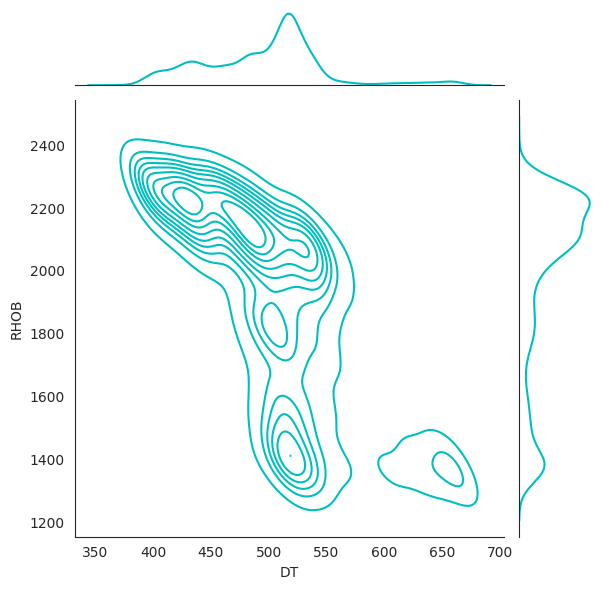

In [ ]:
with sns.axes_style('white'):
    sns.jointplot(x='DT', y='RHOB', data= Well_F02_1,
              kind='kde', color='c')

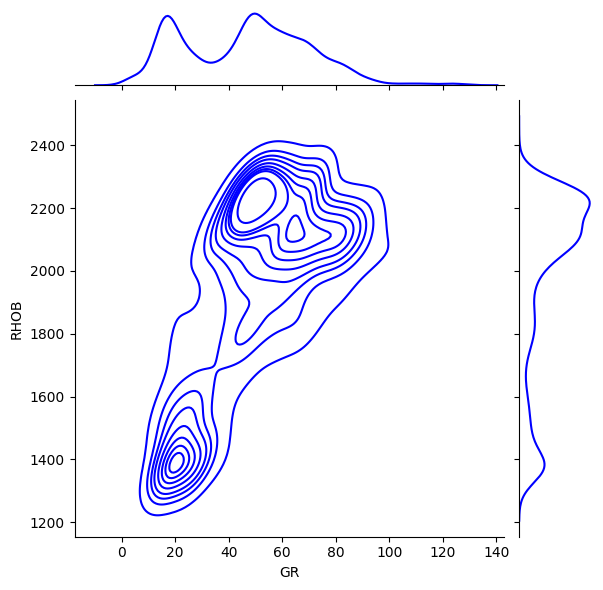

In [ ]:
sns.jointplot(x='GR', y='RHOB', data= Well_F02_1,
              kind='kde', color='b')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


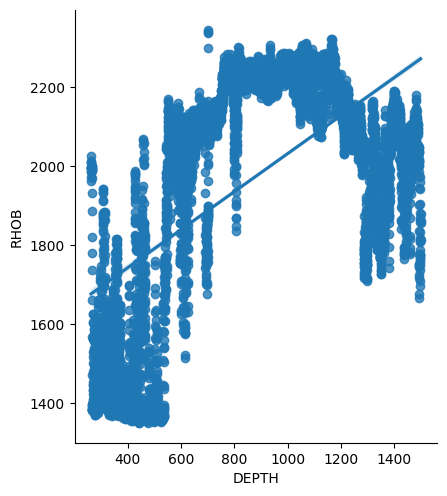

In [ ]:
ax=sns.pairplot(Well_F02_1,
             size=5, aspect=0.9,
             x_vars=['DEPTH'],
             y_vars=['RHOB'],
             kind='reg',
             )
plt.show()
ax.savefig("seaborn_plot_F02-1_pairplot1.jpg", dpi=300)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


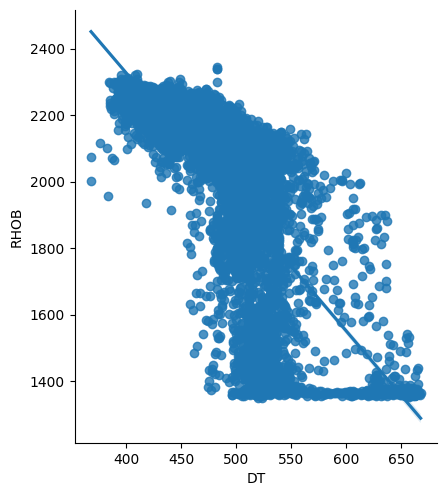

In [ ]:
ax=sns.pairplot(Well_F02_1,
             size=5, aspect=0.9,
             x_vars=['DT'],
             y_vars=['RHOB'],
             kind='reg',
             )
plt.show()
ax.savefig("seaborn_plot_F02-1_pairplot2.jpg", dpi=300)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


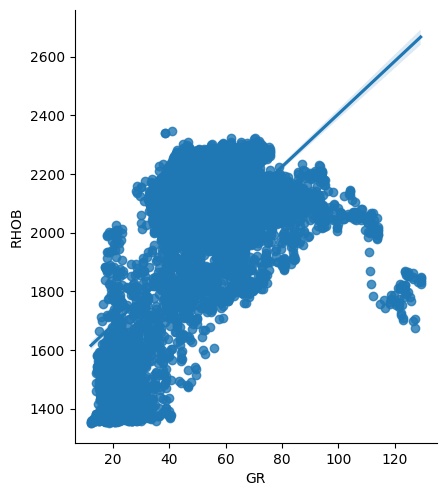

In [ ]:
ax=sns.pairplot(Well_F02_1,
             size=5, aspect=0.9,
             x_vars=['GR'],
             y_vars=['RHOB'],
             kind='reg',
             )
plt.show()
ax.savefig("seaborn_plot_F02-1_pairplot3.jpg", dpi=300)

In [ ]:
pwd

'/content'

# 4. PLOTTING

In [ ]:
def log_plot(logs):
    logs = logs.sort_values(by='DEPTH')
    top = logs.DEPTH.min()
    bot = logs.DEPTH.max()

    f, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,8))
    ax[0].plot(logs.GR, logs.DEPTH, color='green')
    ax[1].plot(logs.PHIE, logs.DEPTH, color='red')
    ax[2].plot(logs.DT, logs.DEPTH, color='black')
    ax[3].plot(logs.AI, logs.DEPTH, color='blue')
    ax[4].plot(logs.RHOB, logs.DEPTH, color='c')

    for i in range(len(ax)):
        ax[i].set_ylim(top,bot)
        ax[i].invert_yaxis()
        ax[i].grid()

    ax[0].set_xlabel("GR (API)")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[0].set_ylabel("Depth(m)")
    ax[1].set_xlabel("PHIE (v/v)")
    ax[1].set_xlim(logs.PHIE.min(),logs.PHIE.max())
    ax[2].set_xlabel("DT (us/m)")
    ax[2].set_xlim(logs.DT.min(),logs.DT.max())
    ax[3].set_xlabel("AI")
    ax[3].set_xlim(logs.AI.min(),logs.AI.max())
    ax[4].set_xlabel("RHOB (KG/m3)")
    ax[4].set_xlim(logs.RHOB.min(),logs.RHOB.max())

    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]);
    ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]);

    f.suptitle('Well: %s'%logs.iloc[0]['WELL_NAME'], fontsize=14,y=0.94)

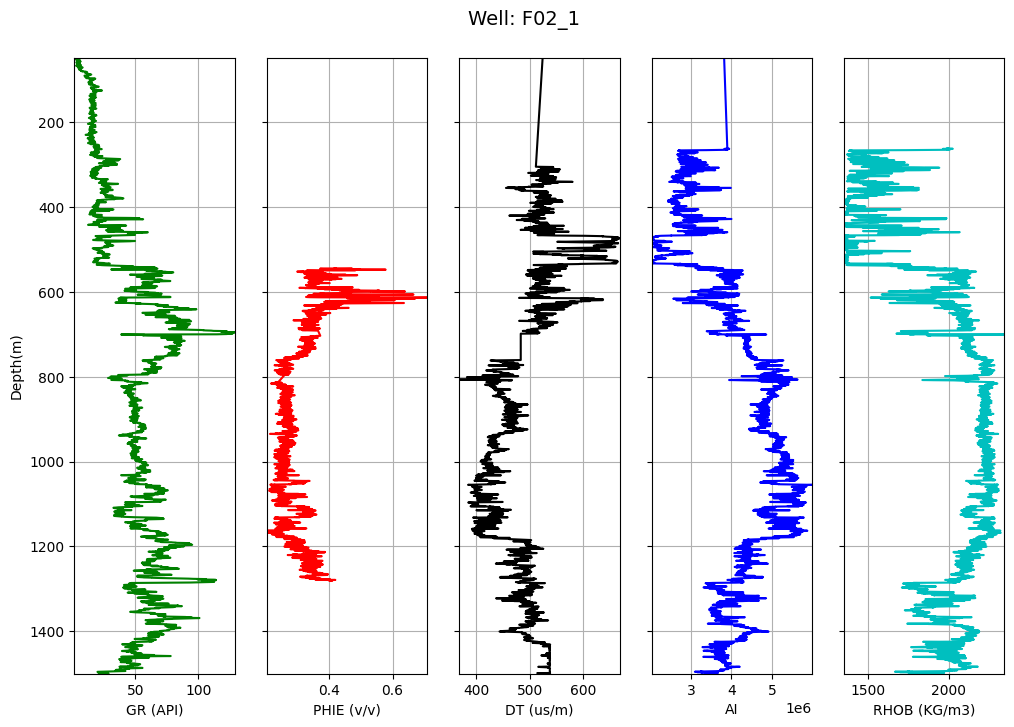

In [ ]:
log_plot(Well_F02_1)

In [ ]:
# # sns_plot = sns.pairplot(Well_F02_1.drop(['DEPTH','AI_REL'],axis=1),
#              hue='GR')
# sns_plot.savefig('cross_plots.png')

# 5. REPEATING THE STEPS FOR OTHER WELLS

In [ ]:
las1=lasio.read("/content/drive/MyDrive/PhD MATERIALS/6. DATA/F3_Data/WELL_LOG_LAS/F03-2_logs.las")

In [ ]:
F03_2=las1.df()

In [ ]:
F03_2.head()

,RHOB,DT,GR,AI,AI_REL,PHIE
DEPTH,,,,,,
30.00,NaN,NaN,NaN,NaN,NaN,NaN
30.15,2048.8999,524.9269,13.6972,3903209.75,702713.2500,0.3757
30.30,2048.8999,524.9194,13.7762,3903265.25,159.6016,0.3757
30.45,2048.8999,524.9120,14.6424,3903320.25,159.6016,0.3757
30.60,2048.8999,524.9048,16.3448,3903374.25,159.6016,0.3757


In [ ]:
F03_2.shape
Well_F03_2 = F03_2.rename_axis('DEPTH').reset_index()
Well_F03_2['WELL_NAME']='F03_2' #adding WELL_NAME Column to all rows
Well_F03_2.head()

,DEPTH,RHOB,DT,GR,AI,AI_REL,PHIE,WELL_NAME
0,30.00,NaN,NaN,NaN,NaN,NaN,NaN,F03_2
1,30.15,2048.8999,524.9269,13.6972,3903209.75,702713.2500,0.3757,F03_2
2,30.30,2048.8999,524.9194,13.7762,3903265.25,159.6016,0.3757,F03_2
3,30.45,2048.8999,524.9120,14.6424,3903320.25,159.6016,0.3757,F03_2
4,30.60,2048.8999,524.9048,16.3448,3903374.25,159.6016,0.3757,F03_2


In [ ]:
Well_F03_2.describe()

,DEPTH,RHOB,DT,GR,AI,AI_REL,PHIE
count,14067.000000,14064.000000,14064.000000,14064.000000,1.406400e+04,1.406400e+04,14064.000000
mean,1084.950030,2148.790752,433.404900,39.885378,5.414503e+06,1.588758e+04,0.313256
std,609.140643,114.293237,101.069973,25.094680,2.011794e+06,3.555520e+05,0.071433
min,30.000000,1910.352700,165.897600,-2.800000,3.164781e+06,-2.014894e+06,-0.215000
25%,557.475000,2068.043050,418.640550,19.554225,4.066597e+06,-5.514136e+04,0.286800
50%,1084.950100,2117.969500,467.599900,43.594450,4.597942e+06,8.662063e+02,0.332500
75%,1612.425100,2191.077075,510.210800,56.601125,5.381452e+06,8.074248e+04,0.363700
max,2139.900100,2994.009300,603.628900,133.454300,1.803542e+07,8.990566e+06,0.462300


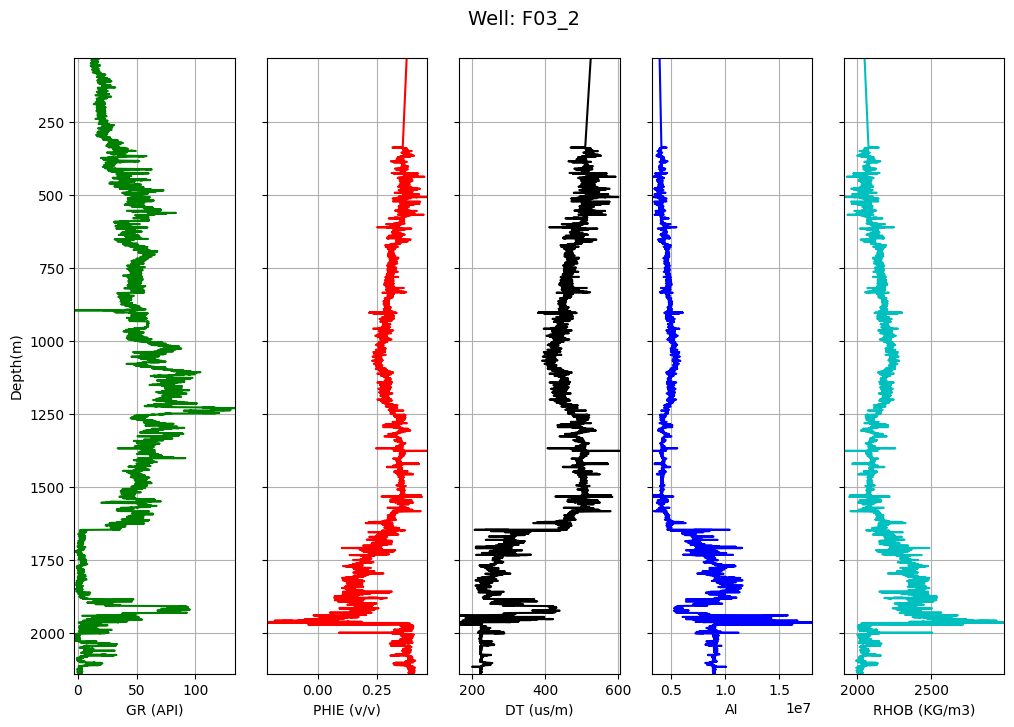

In [ ]:
log_plot(Well_F03_2)

In [ ]:
las2=lasio.read("/content/drive/MyDrive/PhD MATERIALS/6. DATA/F3_Data/WELL_LOG_LAS/F03-4_logs.las")

In [ ]:
F03_4=las2.df()

In [ ]:
F03_4.head()

,RHOB,DT,GR,AI,AI_REL,PHIE
DEPTH,,,,,,
30.00,NaN,NaN,NaN,NaN,NaN,NaN
30.15,2077.7849,508.5176,NaN,4085964.00,-3257.4102,0.3577
30.30,2077.8000,508.5054,NaN,4086092.75,-3257.4102,0.3576
30.45,2077.8000,508.4931,NaN,4086191.00,-3257.4102,0.3576
30.60,2077.8000,508.4809,NaN,4086289.50,-3257.4102,0.3576


In [ ]:
Well_F03_4 = F03_4.rename_axis('DEPTH').reset_index()
Well_F03_4['WELL_NAME']='F03_4' #adding WELL_NAME Column to all rows
Well_F03_4.head()

,DEPTH,RHOB,DT,GR,AI,AI_REL,PHIE,WELL_NAME
0,30.00,NaN,NaN,NaN,NaN,NaN,NaN,F03_4
1,30.15,2077.7849,508.5176,NaN,4085964.00,-3257.4102,0.3577,F03_4
2,30.30,2077.8000,508.5054,NaN,4086092.75,-3257.4102,0.3576,F03_4
3,30.45,2077.8000,508.4931,NaN,4086191.00,-3257.4102,0.3576,F03_4
4,30.60,2077.8000,508.4809,NaN,4086289.50,-3257.4102,0.3576,F03_4


In [ ]:
Well_F03_4.describe()

,DEPTH,RHOB,DT,GR,AI,AI_REL,PHIE
count,12467.000000,12197.000000,12197.000000,12393.000000,1.219700e+04,12197.000000,12197.000000
mean,964.950025,2121.252731,483.917166,45.866961,4.418226e+06,1870.711763,0.330467
std,539.858608,63.811981,36.293508,19.236419,4.642574e+05,107686.397189,0.039883
min,30.000000,1926.000000,376.314000,7.150000,3.238528e+06,-368204.718800,0.212200
25%,497.475000,2083.890100,456.755600,29.376400,4.126141e+06,-39995.222700,0.300700
50%,964.950000,2123.500000,482.538200,44.170600,4.400732e+06,254.379600,0.329100
75%,1432.425050,2168.879400,505.040500,61.507700,4.748426e+06,51809.226600,0.353800
max,1899.900000,2310.500000,594.714500,104.350000,6.139819e+06,504565.875000,0.452500


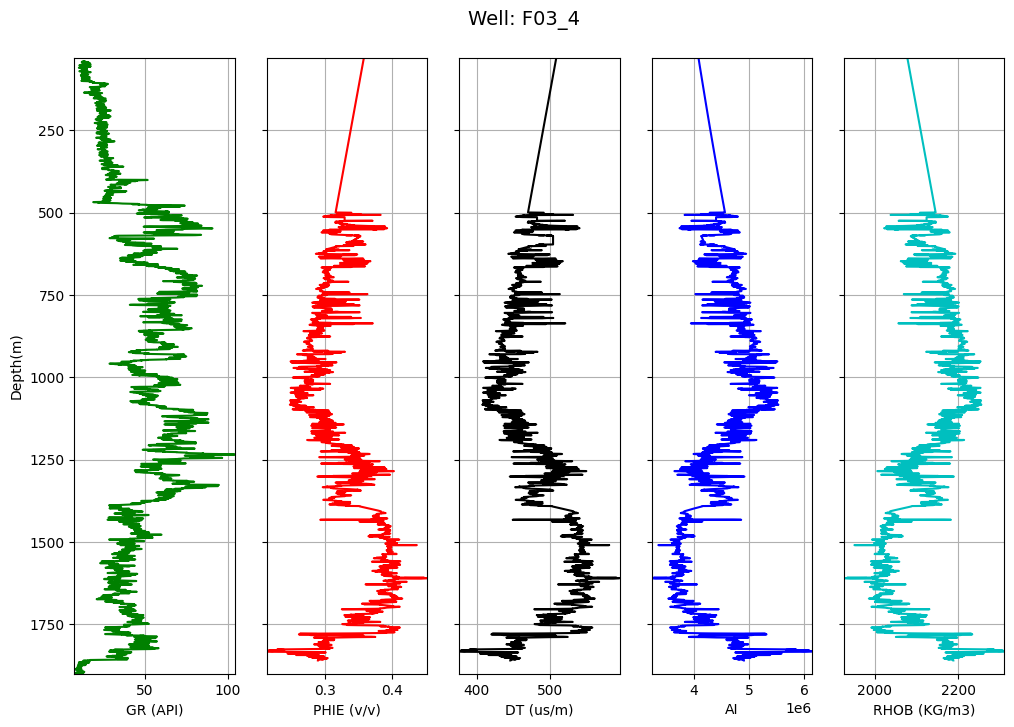

In [ ]:
log_plot(Well_F03_4)

In [ ]:
las3=lasio.read("/content/drive/MyDrive/PhD MATERIALS/6. DATA/F3_Data/WELL_LOG_LAS/F06-1_logs.las")

In [ ]:
F06_1=las3.df()

In [ ]:
F06_1.head()

,RHOB,DT,GR,AI,AI_REL,PHIE
DEPTH,,,,,,
28.64,NaN,NaN,NaN,NaN,NaN,NaN
28.79,NaN,NaN,NaN,NaN,NaN,NaN
28.94,NaN,NaN,NaN,NaN,NaN,NaN
29.09,NaN,NaN,NaN,NaN,NaN,NaN
29.24,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Well_F06_1 = F06_1.rename_axis('DEPTH').reset_index()
Well_F06_1['WELL_NAME']='F06_1' #adding WELL_NAME Column to all rows
Well_F06_1.head()

,DEPTH,RHOB,DT,GR,AI,AI_REL,PHIE,WELL_NAME
0,28.64,NaN,NaN,NaN,NaN,NaN,NaN,F06_1
1,28.79,NaN,NaN,NaN,NaN,NaN,NaN,F06_1
2,28.94,NaN,NaN,NaN,NaN,NaN,NaN,F06_1
3,29.09,NaN,NaN,NaN,NaN,NaN,NaN,F06_1
4,29.24,NaN,NaN,NaN,NaN,NaN,NaN,F06_1


In [ ]:
Well_F06_1.describe()

,DEPTH,RHOB,DT,GR,AI,AI_REL,PHIE
count,11143.000000,11138.000000,11138.000000,10999.000000,1.113800e+04,1.113800e+04,11138.000000
mean,864.290028,2133.862874,476.645845,47.386503,4.556058e+06,1.173803e+04,0.322586
std,482.527726,81.778230,46.453718,20.702674,8.387316e+05,3.440747e+05,0.051111
min,28.640000,2015.216600,234.206100,-2.819900,3.704115e+06,-1.580104e+06,0.055900
25%,446.465000,2075.746250,453.717475,29.640600,4.072889e+06,-3.286427e+04,0.297325
50%,864.290000,2107.943850,491.373800,47.854500,4.289907e+06,1.918224e+02,0.338800
75%,1282.115050,2174.181475,509.658200,61.268950,4.791931e+06,4.169705e+04,0.358900
max,1699.940100,2560.648200,544.056900,129.227700,1.093431e+07,5.632485e+06,0.396800


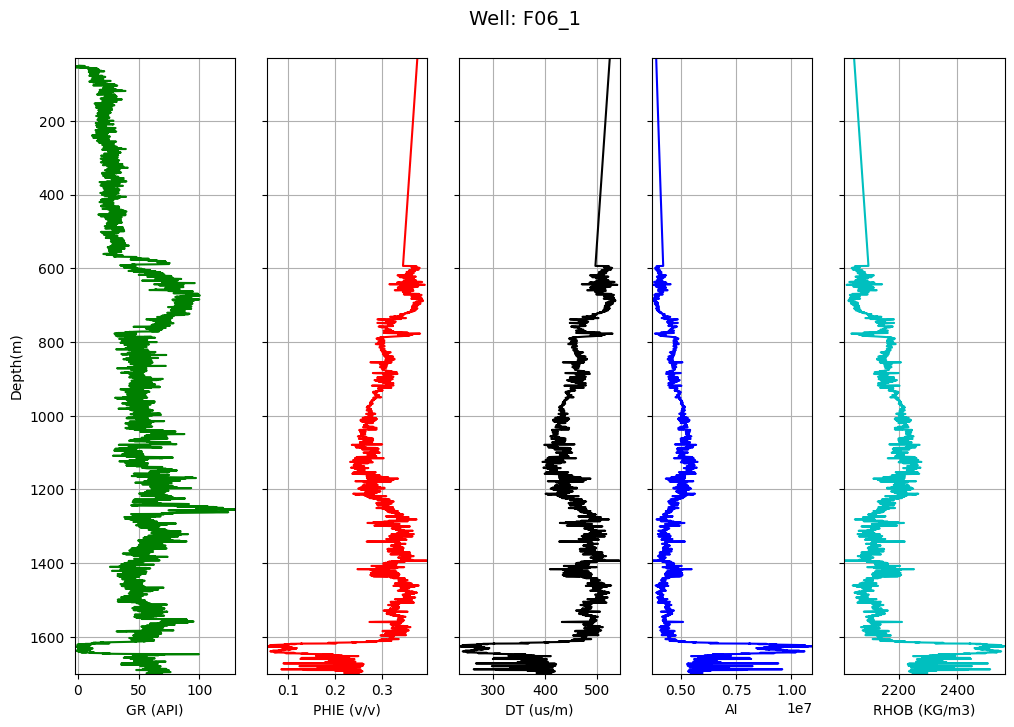

In [ ]:
log_plot(Well_F06_1)

# 6. PREPARATION OF TRAINING DATASET

Append 3 data frames of different wells

In [ ]:
Combined_data=[Well_F02_1, Well_F03_2, Well_F03_4]

In [ ]:
Training_Data=pd.concat(Combined_data)

In [ ]:
Training_Data.head()

,DEPTH,RHOB,DT,GR,AI,AI_REL,PHIE,WELL_NAME
0,48.00,NaN,524.0485,NaN,3820257.00,-455.6956,NaN,F02_1
1,48.15,NaN,524.0410,NaN,3820311.75,-455.6956,NaN,F02_1
2,48.30,NaN,524.0336,NaN,3820366.25,-455.6956,NaN,F02_1
3,48.45,NaN,524.0262,NaN,3820419.75,-455.6956,NaN,F02_1
4,48.60,NaN,524.0190,NaN,3820472.25,-455.6956,NaN,F02_1


In [ ]:
Training_Data.isna().sum()

DEPTH           0
RHOB         1700
DT            273
GR             91
AI            273
AI_REL        273
PHIE         5047
WELL_NAME       0
dtype: int64

**Training Data:** Combining data of three wells i.e.- Well_F02_1, Well_F03_2, Well_F03_4

**Training Data Sorted** : Taking the four columns of Data i.e.- Depth, RHOB, DT & GR

Here the Objective is to predict the RHOB from DT and GR. So, we first need to create a training set where all values are present. Further we need to test the relationship to the missing data of RHOB where DT and GR are present

In [ ]:
Training_data_sorted=Training_Data[["DEPTH","RHOB","DT","GR"]]

In [ ]:
Training_data_sorted.head()

,DEPTH,RHOB,DT,GR
0,48.00,NaN,524.0485,NaN
1,48.15,NaN,524.0410,NaN
2,48.30,NaN,524.0336,NaN
3,48.45,NaN,524.0262,NaN
4,48.60,NaN,524.0190,NaN


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


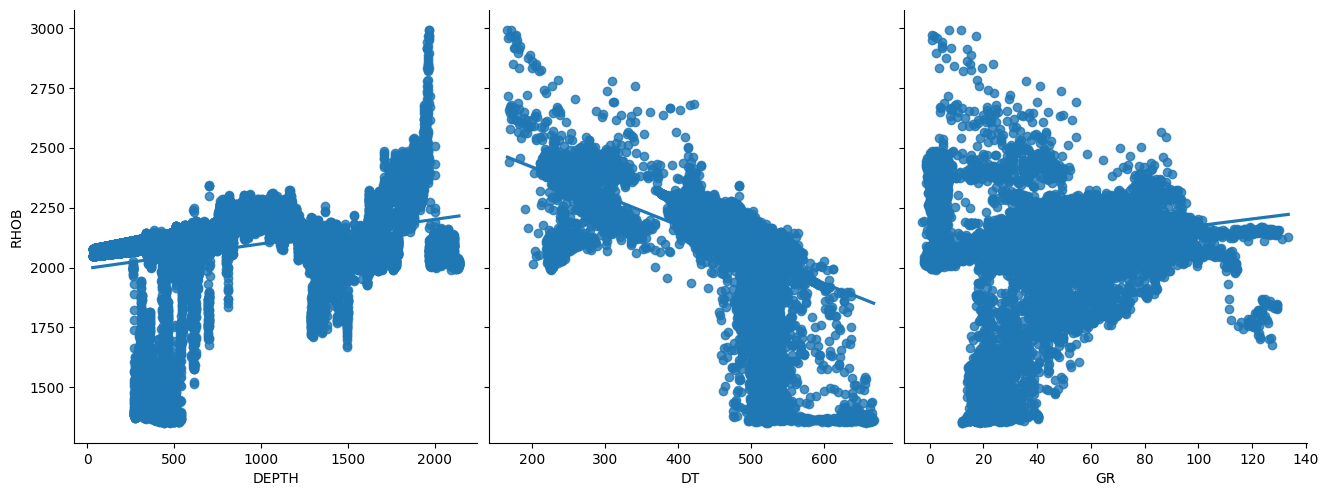

In [ ]:
train_plot_sorted=sns.pairplot(Training_data_sorted,
             size=5, aspect=0.9,
             x_vars=['DEPTH','DT','GR'],
             y_vars=['RHOB'],
             kind='reg',
             )
plt.show()
train_plot_sorted.savefig("seaborn_Train_Sorted_pairplot.jpg", dpi=300)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


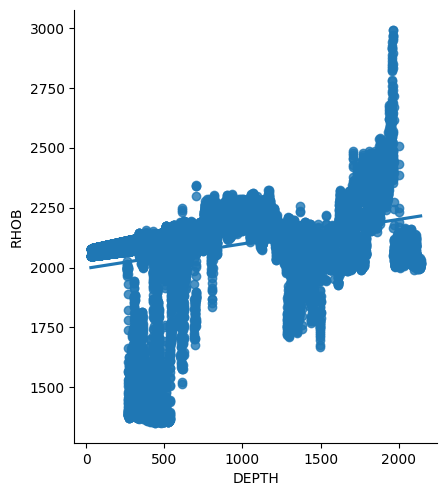

In [ ]:
train_plot_sorted=sns.pairplot(Training_data_sorted,
             size=5, aspect=0.9,
             x_vars=['DEPTH'],
             y_vars=['RHOB'],
             kind='reg',
             )
plt.show()
train_plot_sorted.savefig("seaborn_Train_Sorted_pairplot1.jpg", dpi=300)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


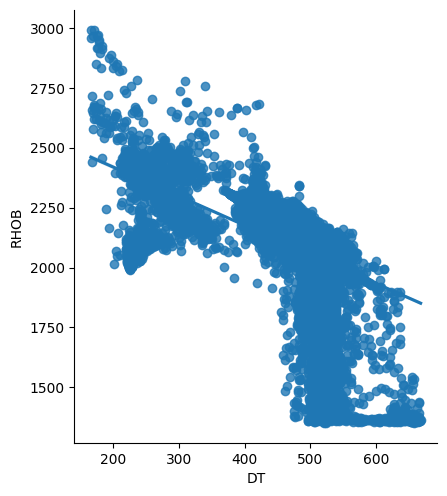

In [ ]:
train_plot_sorted=sns.pairplot(Training_data_sorted,
             size=5, aspect=0.9,
             x_vars=['DT'],
             y_vars=['RHOB'],
             kind='reg',
             )
plt.show()
train_plot_sorted.savefig("seaborn_Train_Sorted_pairplot2.jpg", dpi=300)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


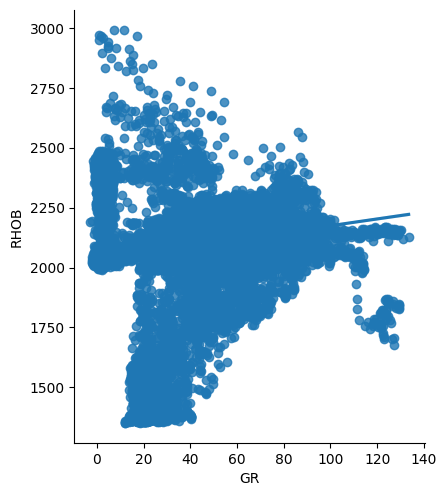

In [ ]:
train_plot_sorted=sns.pairplot(Training_data_sorted,
             size=5, aspect=0.9,
             x_vars=['GR'],
             y_vars=['RHOB'],
             kind='reg',
             )
plt.show()
train_plot_sorted.savefig("seaborn_Train_Sorted_pairplot3.jpg", dpi=300)

In [ ]:
Training_data_sorted.isna().sum()

DEPTH       0
RHOB     1700
DT        273
GR         91
dtype: int64

In [ ]:
Train_final=Training_data_sorted.dropna() #creating a datset where all missing values are omitted.
# We will use this data to generate the relatoionship
#and further will use in predicting the RHOB where GR and DT are present

In [ ]:
Train_final.isna().sum() #Data of all three wells combined where no missing value is present

DEPTH    0
RHOB     0
DT       0
GR       0
dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


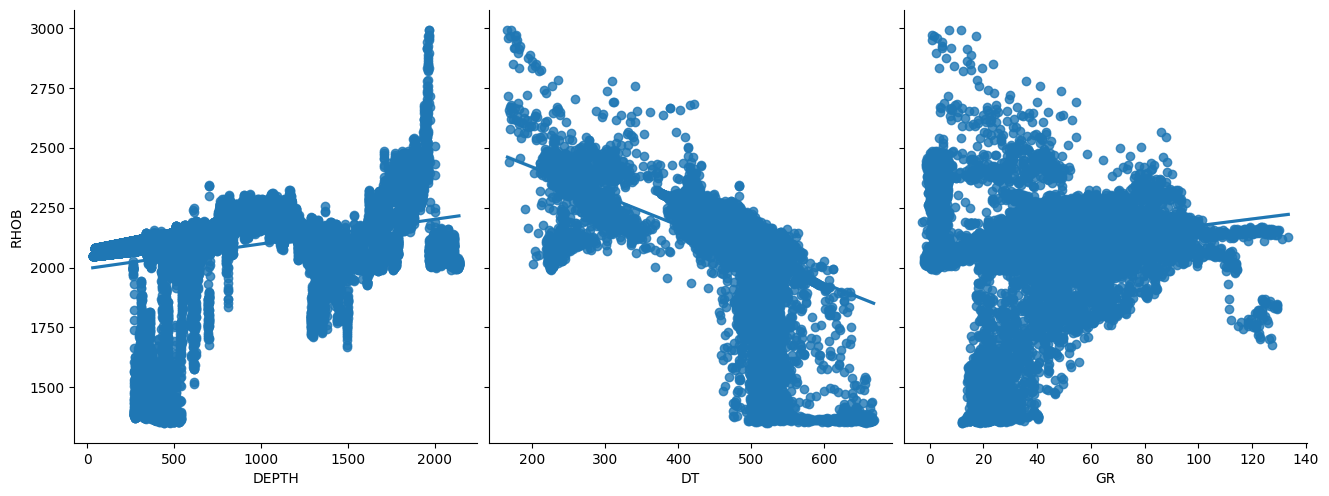

In [ ]:
train_plot=sns.pairplot(Train_final,
             size=5, aspect=0.9,
             x_vars=['DEPTH','DT','GR'],
             y_vars=['RHOB'],
             kind='reg',
             )
plt.show()
train_plot.savefig("seaborn_Train_Final_pairplot.jpg", dpi=300)

In [ ]:
cormat=Train_final.corr()
cormat

,DEPTH,RHOB,DT,GR
DEPTH,1.000000,0.305279,-0.525530,0.027979
RHOB,0.305279,1.000000,-0.523873,0.176341
DT,-0.525530,-0.523873,1.000000,0.282169
GR,0.027979,0.176341,0.282169,1.000000


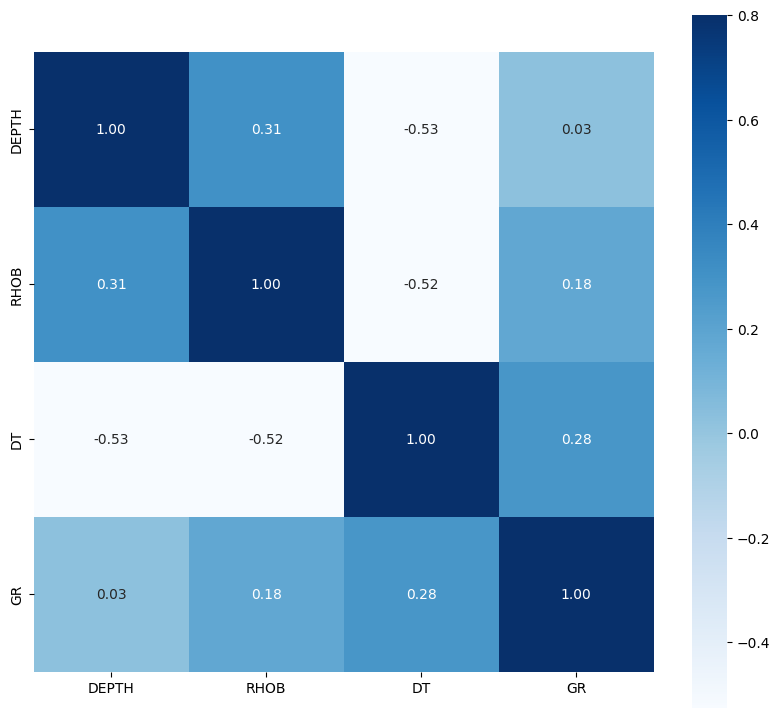

In [ ]:
plt.subplots(figsize=(10,9))
heatmap=sns.heatmap(cormat, vmax=0.8,
            square=True, annot=True,
            fmt='.2f', cmap='Blues')
plt.show()


# 7. select features and target log that has value

In [ ]:
X=Train_final[['DEPTH','DT','GR']]
y=Train_final[['RHOB']]
XX=Training_data_sorted[['DEPTH','DT','GR']] #missing values are present here (DT-273 & GR-91)

#Plotting the data in heatmap SNS
plt.figure(figsize = (12,4))
# sns.heatmap(df.corr())
sns.heatmap(Train_final[['RHOB','DT','GR']].corr())
plt.show()

NameError: ignored

In [ ]:
# #saving the X and y to colab for quick access to the data
# from google.colab import files
# X.to_csv('X.csv')
# files.download('X.csv')
# y.to_csv('y.csv')
# files.download('y.csv')

In [ ]:
# read X and y data from drive
X=pd.read_csv("/content/drive/MyDrive/PhD MATERIALS/6. DATA/F3_Data/DATA_Updated_for ML/X.csv")
y=pd.read_csv("/content/drive/MyDrive/PhD MATERIALS/6. DATA/F3_Data/DATA_Updated_for ML/y.csv")

In [ ]:
X.head()

,DEPTH,DT,GR
0,262.05,513.5145,20.8059
1,262.20,513.5073,21.1575
2,262.35,513.4998,21.3494
3,262.50,513.4924,21.1685
4,262.65,513.4849,21.1536


# Extra. Garder's equation application from DT based on data

If Vp is measured in m/s and you density in kg/m3, then alpha=310
 and the equation is:

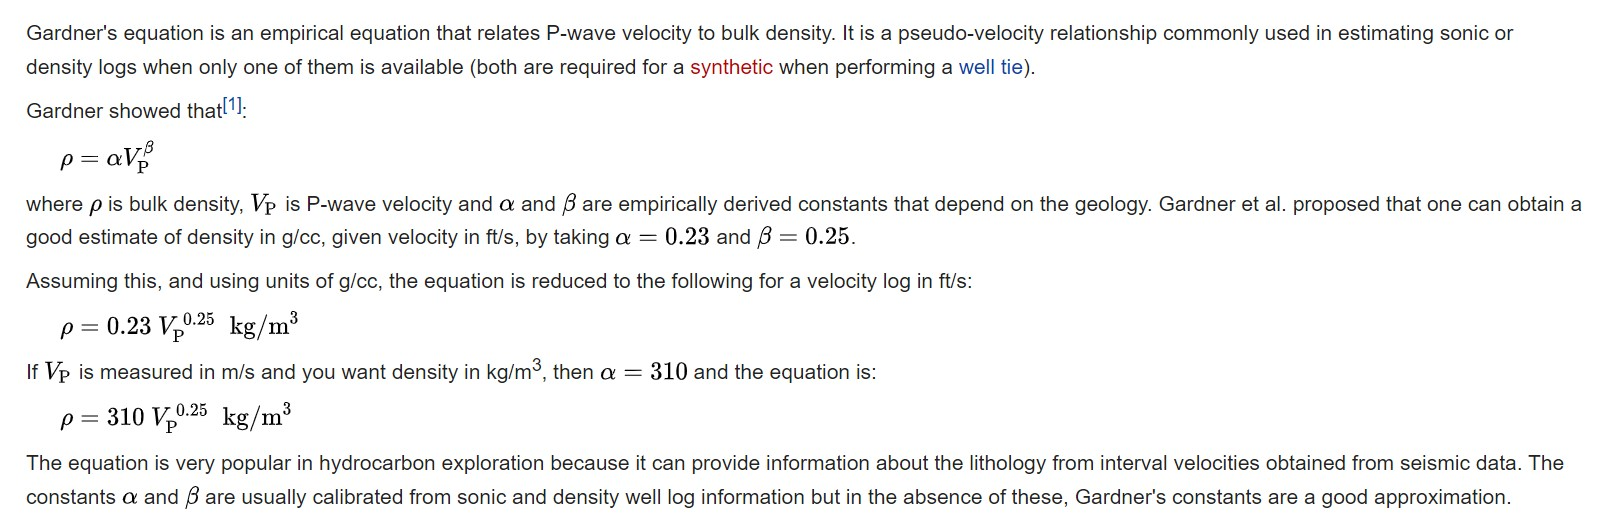

In [ ]:
PX=X
PX['RHOB']=y
PX.head()

,DEPTH,DT,GR,RHOB
0,262.05,513.5145,20.8059,1998.9065
1,262.20,513.5073,21.1575,1989.1794
2,262.35,513.4998,21.3494,1985.5889
3,262.50,513.4924,21.1685,2008.2076
4,262.65,513.4849,21.1536,2026.0713


In [ ]:
#updated data base
PX['Vel']=(1000000/(PX['DT']))
PX.head()


,DEPTH,DT,GR,RHOB,Vel
0,262.05,513.5145,20.8059,1998.9065,1947.364680
1,262.20,513.5073,21.1575,1989.1794,1947.391984
2,262.35,513.4998,21.3494,1985.5889,1947.420427
3,262.50,513.4924,21.1685,2008.2076,1947.448492
4,262.65,513.4849,21.1536,2026.0713,1947.476937


In [ ]:
import math
PX_New=PX[['RHOB', 'Vel']]
PX_New=np.log10(PX_New)
PX_New.head()

,RHOB,Vel
0,3.300792,3.289447
1,3.298674,3.289453
2,3.297889,3.289460
3,3.302809,3.289466
4,3.306655,3.289472


In [ ]:
x_gardner_log=PX_New[['Vel']]
y_gardner_log=PX_New[['RHOB']]

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:

lr_gardner=LinearRegression().fit(x_gardner_log, y_gardner_log)
r_sq = lr_gardner.score(x_gardner_log, y_gardner_log)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.17592427785359666


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


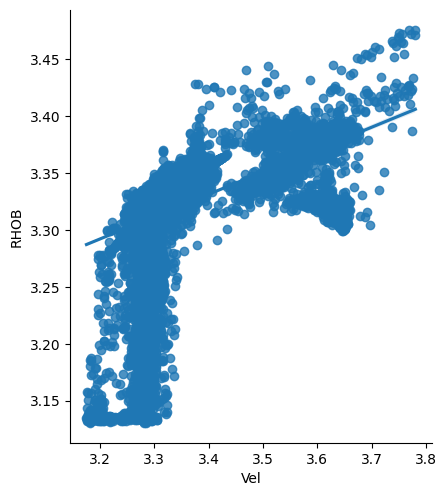

In [ ]:
ax=sns.pairplot(PX_New,
             size=5, aspect=0.9,
             x_vars=['Vel'],
             y_vars=['RHOB'],
             kind='reg',
             )
plt.show()
ax.savefig("seaborn_plot_Train_log-log_Gardner.jpg", dpi=300)

In [ ]:
print(f"intercept: {lr_gardner.intercept_}")


print(f"slope: {lr_gardner.coef_}")


intercept: [2.66335173]
slope: [[0.19651994]]


so the values of α and β are estimated as
α= 10^2.663351 = 460.63
β= 0.19651

# 8. Preparation and Application of Different Regression Model

## 8.0 Dividing Data into Training and Testing Set & applying LR

In [ ]:
#importing Libraries for regression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:

X.insert(0, 'Intercept', 1)

In [ ]:
X.head()

,Intercept,DEPTH,DT,GR
0,1,262.05,513.5145,20.8059
1,1,262.20,513.5073,21.1575
2,1,262.35,513.4998,21.3494
3,1,262.50,513.4924,21.1685
4,1,262.65,513.4849,21.1536


In [ ]:
# scaling
#scaler = StandardScaler()
#X = scaler.fit_transform(X)
#X_b = scaler.fit_transform(XX)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(27552, 3)
(27552, 1)


### testing code

In [ ]:
features_df.shape[0]

27552

In [ ]:
predicted=prediction(weights,features_df)

In [ ]:
error_val=error(targets,predicted)

In [ ]:
cost=cost_val(error_val)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
error_val.shape

(27552, 1)

In [ ]:
cost

RHOB    2.980725e+06
dtype: float64

In [ ]:
def gradients(error_val,features_df):
    error_val = error_val.T
    temp_gradients = np.dot(error_val,features_df) ### (1,4)
    temp_gradients = temp_gradients.T #### (4,1)
    temp_gradients = temp_gradients*(-2)
    temp_gradients = temp_gradients/(features_df.shape[0])
   # grads = np.reshape(temp_gradients,-1) ###(3,)
    grads = np.reshape(temp_gradients, newshape = (4,1)) ###(4,1)
    return(grads)

In [ ]:
gradients(error_val,features_df)

array([[   -3431.87017954],
       [-3334358.89451666],
       [-1587124.42053354],
       [ -155999.88682559]])

In [ ]:
error_val = error_val.T
temp_gradients = np.dot(error_val,features_df) ### (1,4)
temp_gradients = temp_gradients.T #### (4,1)
temp_gradients = temp_gradients*(-2)
temp_gradients = temp_gradients/(features_df.shape[0])

##8.1 Linear Regression Model

In [ ]:



def prediction(weights, features_df):
    predicted_vals = np.dot(features_df,weights) ## (27552,1)
    return(predicted_vals)


def error (targets,predicted):
    error_val = (targets-predicted)
    return(error_val)

def cost_val(error_val):
    cost = np.mean(error_val**2)  #### mean squared error value
    return (cost)


#### pred_y = wo*xo + w1*x1 + w2*x2

##### cost_funct = (y - (wo*xo +w1*x1 +w2*x2))^2

##### gradient (cost_fucnt)/wo = 2 * (y- wo*xo + w1*x1 + w2*x2) * xo


def gradients(error_val,features_df):
    error_val = error_val.T
    temp_gradients = np.dot(error_val,features_df) ### (1,4)
    temp_gradients = temp_gradients.T #### (4,1)
    temp_gradients = temp_gradients*(-2)
    temp_gradients = temp_gradients/(features_df.shape[0])
   # grads = np.reshape(temp_gradients,-1) ###(3,)
    grads = np.reshape(temp_gradients, newshape = (4,1)) ###(4,1)
    return(grads)



def linearReg(features_df,targets,weights,learning_rate,n_iter = 100):

  error_list= []
  for i in range(100):
    ##### Step-2 : Compute prediction ###

    predict_vector = prediction(weights,features_df)

    ##### Step -3 : Compute cost #####

    error_vector = error(targets,predict_vector)
    cost_value = cost_val(error_vector)

    #### Step -4 : Gradient descent ######

    weights = weights - learning_rate * gradients(error_vector,features_df)

    error_list.append(cost_value)

    print("iteration : {} Cost : {}".format(i,cost_value))

  return(weights,error_list)


In [ ]:
###### Create a function to estimate the values of coefficients #####

features_df = X_train.copy(deep = True) ### (27552,4)
targets = y_train ### (27552,1)
weights = np.random.random(size = (4,1)) #### Step-1 :random initialization ### (3,1)

In [ ]:
coeffs,errors = linearReg(features_df,targets,weights,0.001,10)

In [ ]:
##### Plotting the errors vs iteration #####

sns.scatterplot(x= range(len(errors)),y = errors)

plt.xlabel('ITERATION NUM')

plt.ylabel('COST')

plt.title('Cost with Iterations')

## 8.2 Model Preparation for MLP Regressor

In [ ]:
MLP_RHOB = MLPRegressor(random_state=1, max_iter= 1000).fit(X_train, y_train) #fit the model
MLP_RHOB.score(X_test, y_test) # examine accuracy
# accuracy: 0.7207288847159162

# data_fe['RHOB_pred'] = MLP_pe.predict(X_b)  # predict PE
# data_fe.PE.fillna(data_fe.PE_pred, inplace =True) # fill NaN vakues with predicted PE

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7207288847159162

In [ ]:
#MLP Regression with Only DT
X1=X[['DT','DEPTH']]
y1=y
X1.head()
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
MLP_RHOB_from_DT = MLPRegressor(random_state=1, max_iter= 1000).fit(X1_train, y1_train) #fit the model
MLP_RHOB_from_DT.score(X1_test, y1_test) # examine accuracy
# accuracy: 0.7207288847159162

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5787706899356696

In [ ]:
# save the model to disk
import pickle
filename = 'model_MLP_RHOB.sav'
pickle.dump(MLP_RHOB, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

## 8.2a Deep learning by keras layers example

In [ ]:
from keras import models
from keras import layers
import keras

### Model Definition

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu",input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### K-fold Validation

In [ ]:
k = 4
num_val_samples = len(X_train) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [X_train[:i * num_val_samples],
         X_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [ ]:
all_scores

[80.39651489257812, 82.606201171875, 98.37709045410156, 103.53609466552734]

In [ ]:
np.mean(all_scores)

91.22897529602051

### Saving the Validation logs at each fold

In [ ]:
#Saving the validation logs at each fold
num_epochs = 200
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [X_train[:i * num_val_samples],
         X_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


### Building the History of successive mean k-fold validation scores

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

### Plotting Validation scores

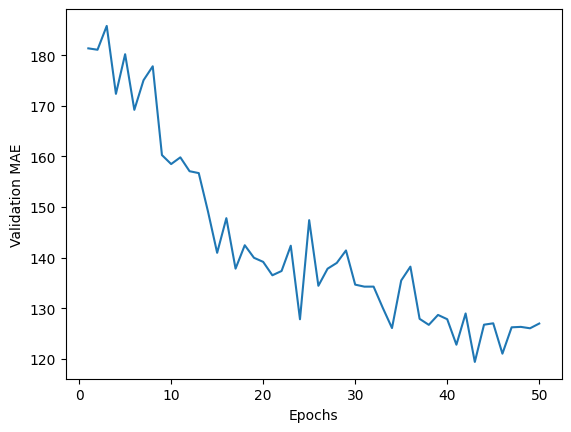

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

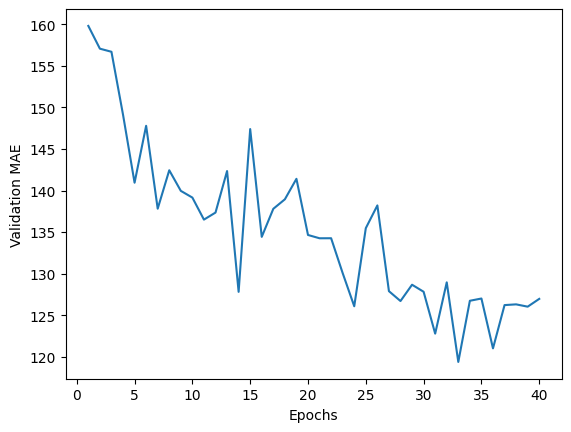

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [ ]:
model = build_model()
model.fit(X_train, y_train,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

KeyboardInterrupt: ignored

In [ ]:
test_mae_score

In [ ]:
predictions = model.predict(test_data)
predictions[0]

## 8.3 Application on Unseen Data- Well_F06-1

In [ ]:
Well_F06_sort=Well_F06_1[['DEPTH','DT','GR','RHOB']]

In [ ]:
Well_F06_sort.isna().sum()

In [ ]:
Well_F06_sort_b=Well_F06_sort.dropna()
Well_F06_sort_b.isna().sum()

In [ ]:
#Prediction using Model
Well_F06_sort_b['RHOB_PRED']=MLP_RHOB.predict(Well_F06_sort_b[['DEPTH','DT','GR']])


In [ ]:
Well_F06_sort_b.head()

In [ ]:
#Plotting the data
def log_plot_Result(logs):
    logs = logs.sort_values(by='DEPTH')
    top = logs.DEPTH.min()
    bot = logs.DEPTH.max()

    f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,8))
    ax[0].plot(logs.GR, logs.DEPTH, color='green')
    ax[1].plot(logs.DT, logs.DEPTH, color='black')
    ax[2].plot(logs.RHOB_PRED, logs.DEPTH, color='blue')
    ax[2].plot(logs.RHOB, logs.DEPTH, color='c')

    for i in range(len(ax)):
        ax[i].set_ylim(600,bot)
        ax[i].invert_yaxis()
        ax[i].grid()

    ax[0].set_xlabel("GR (API)")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[0].set_ylabel("Depth(m)")
    ax[1].set_xlabel("DT (us/m)")
    ax[1].set_xlim(logs.DT.min(),logs.DT.max())
    ax[2].set_xlabel("RHOB(c) and RHOB_Pred(blue)\n KG\m3")
    ax[2].set_xlim(1800,3000)

    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]);

    f.suptitle('Well: F06_1', fontsize=14,y=0.94)

In [ ]:
log_plot_Result(Well_F06_sort_b)

## 8.3 a Preparation of Simple Linear Regression

## 8.3 Comparison of different Optimization algorithms of MLP Regression

In [ ]:
MLP_RHOB_adam = MLPRegressor(random_state=1, max_iter= 1000).fit(X_train, y_train) #fit the model with default MLP Regression, solver adam
MLPRegressor_adam_train_score=MLP_RHOB_adam.score(X_train,y_train)
MLPRegressor_adam_test_score=MLP_RHOB_adam.score(X_test,y_test)
print("***********")
print ("MLP Regression training score with 2 layers_adam", MLPRegressor_adam_train_score)
print ("MLP Regression test score with 2 layers_adam", MLPRegressor_adam_test_score)

In [ ]:

MLP_RHOB_adam_alpha = MLPRegressor(random_state=1, max_iter= 1000, alpha=0.002).fit(X_train, y_train) #fit the model with default MLP Regression, solver adam, alpha optimised
MLPRegressor_adam_alpha_train_score=MLP_RHOB_adam_alpha.score(X_train,y_train)
MLPRegressor_adam_alpha_test_score=MLP_RHOB_adam_alpha.score(X_test,y_test)
print("***********")
print ("MLP Regression training score with 2 layers_adam_alpha", MLPRegressor_adam_alpha_train_score)
print ("MLP Regression test score with 2 layers_adam_alpha", MLPRegressor_adam_alpha_test_score)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


***********
MLP Regression training score with 2 layers_adam_alpha 0.6981453592397213
MLP Regression test score with 2 layers_adam_alpha 0.6998724799374474


In [ ]:
MLP_RHOB_sgd = MLPRegressor(random_state=1, solver='sgd', max_iter= 1000).fit(X_train, y_train) #fit the model with solver sgd
MLPRegressor_sgd_train_score=MLP_RHOB_sgd.score(X_train,y_train)
MLPRegressor_sgd_test_score=MLP_RHOB_sgd.score(X_test,y_test)
print("***********")
print ("MLP Regression training score with 2 layers_sgd", MLPRegressor_sgd_train_score)
print ("MLP Regression test score with 2 layers_sgd", MLPRegressor_sgd_test_score)

In [ ]:
MLP_RHOB_tanh = MLPRegressor(random_state=1, activation='tanh', max_iter= 1000).fit(X_train, y_train) #fit the model with solver adam and activation tanh
MLPRegressor_tanh_train_score=MLP_RHOB_tanh.score(X_train,y_train)
MLPRegressor_tanh_test_score=MLP_RHOB_tanh.score(X_test,y_test)
print("***********")
print ("MLP Regression training score with 2 layers_tanh", MLPRegressor_tanh_train_score)
print ("MLP Regression test score with 2 layers_tanh", MLPRegressor_tanh_test_score)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


***********
MLP Regression training score with 2 layers_tanh 0.38935517771732175
MLP Regression test score with 2 layers_tanh 0.3877771036652402


In [ ]:
MLP_RHOB_lbfgs = MLPRegressor(random_state=1, solver='lbfgs', max_iter= 1000).fit(X_train, y_train) #fit the model with solver lbfgs
MLPRegressor_lbfgs_train_score=MLP_RHOB_lbfgs.score(X_train,y_train)
MLPRegressor_lbfgs_test_score=MLP_RHOB_lbfgs.score(X_test,y_test)

In [ ]:
MLP_RHOB_3_layers = MLPRegressor(random_state=1, max_iter= 200).fit(X_train, y_train) #fit the model more hidden layers, solver ADAM
MLPRegressor_3_layers_train_score=MLP_RHOB_3_layers.score(X_train,y_train)
MLPRegressor_3_layers_test_score=MLP_RHOB_3_layers.score(X_test,y_test)

In [ ]:
print("***********")
print ("MLP Regression training score with 2 layers_adam", MLPRegressor_adam_train_score)
print ("MLP Regression test score with 2 layers_adam", MLPRegressor_adam_test_score)

print("***********")
print ("MLP Regression training score with 2 layers_sgd", MLPRegressor_sgd_train_score)
print ("MLP Regression test score with 2 layers_sgd", MLPRegressor_sgd_test_score)

print("***********")
print ("MLP Regression training score with 2 layers_lbfgs", MLPRegressor_lbfgs_train_score)
print ("MLP Regression test score with 2 layers_lbfgs", MLPRegressor_lbfgs_test_score)

print("***********")
print ("MLP Regression training score with 3 layers_adam", MLPRegressor_3_layers_train_score)
print ("MLP Regression test score with 3 layers_adam", MLPRegressor_3_layers_test_score)

***********
MLP Regression training score with 2 layers_adam 0.7172246998335909
MLP Regression test score with 2 layers_adam 0.7207288847159162
***********
MLP Regression training score with 2 layers_sgd -1.3965623911982306e-05
MLP Regression test score with 2 layers_sgd -3.549681728753917e-05
***********
MLP Regression training score with 2 layers_lbfgs -0.15839651071357053
MLP Regression test score with 2 layers_lbfgs -0.22743063892733062
***********
MLP Regression training score with 3 layers_adam 0.09905488436088605
MLP Regression test score with 3 layers_adam 0.03996204711307627


## 8.4 Model Preparation Using Simple Linear and Ridge Regression

In [ ]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from pylab import rcParams

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
rr = Ridge(alpha=0.01)
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization,
# in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

In [ ]:
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

In [ ]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

In [ ]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

In [ ]:
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

### 8.4.1 Comparison amongst different algorithms

In [ ]:
print ("linear Regression training score:", train_score)
print ("linear Regression test score: ", test_score)

print("***********")
print ("Ridge Regression training score with alpha=.01:", Ridge_train_score)
print ("Ridge Regression test score with alpha=.01: ", Ridge_test_score)

print("***********")
print ("Ridge Regression training score with alpha=100:", Ridge_train_score)
print ("Ridge Regression test score with alpha=100: ", Ridge_test_score)


## 8.5 Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
import numpy as np

In [ ]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [ ]:
print ("training score:", train_score)
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.39071409625092934
test score:  0.3874358532562734
number of features used:  3


In [ ]:
lasso001 = Lasso(alpha=0.01, max_iter=10000)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

In [ ]:
print ("training score for alpha=0.01:", train_score001)
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)

training score for alpha=0.01: 0.39071419195542123
test score for alpha =0.01:  0.38742922971479
number of features used: for alpha =0.01: 3


In [ ]:
lasso10 = Lasso(alpha=10, max_iter=100000)
lasso10.fit(X_train,y_train)
train_score10=lasso10.score(X_train,y_train)
test_score10=lasso10.score(X_test,y_test)
coeff_used10 = np.sum(lasso10.coef_!=0)

In [ ]:
print ("training score for alpha=10:", train_score10)
print ("test score for alpha =10: ", test_score10)
print ("number of features used: for alpha =10:", coeff_used10)

training score for alpha=10: 0.3907046216716624
test score for alpha =10:  0.38748697736284676
number of features used: for alpha =10: 3


## 8.6 SVR

In [ ]:
from sklearn.svm import SVR

In [ ]:
SVR_Regressor=SVR(kernel="rbf")
SVR_Regressor.fit(X_train,y_train)